In [41]:
!pip install catboost

import numpy as np
import pandas as pd
import catboost as cb
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn import datasets

%matplotlib inline

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.15 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [33]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [34]:
pd.unique(iris.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Задание 1

In [35]:
d = {'setosa' : 0, 'versicolor' : 1,'virginica' : 2}
iris['species']=iris['species'].map(d)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


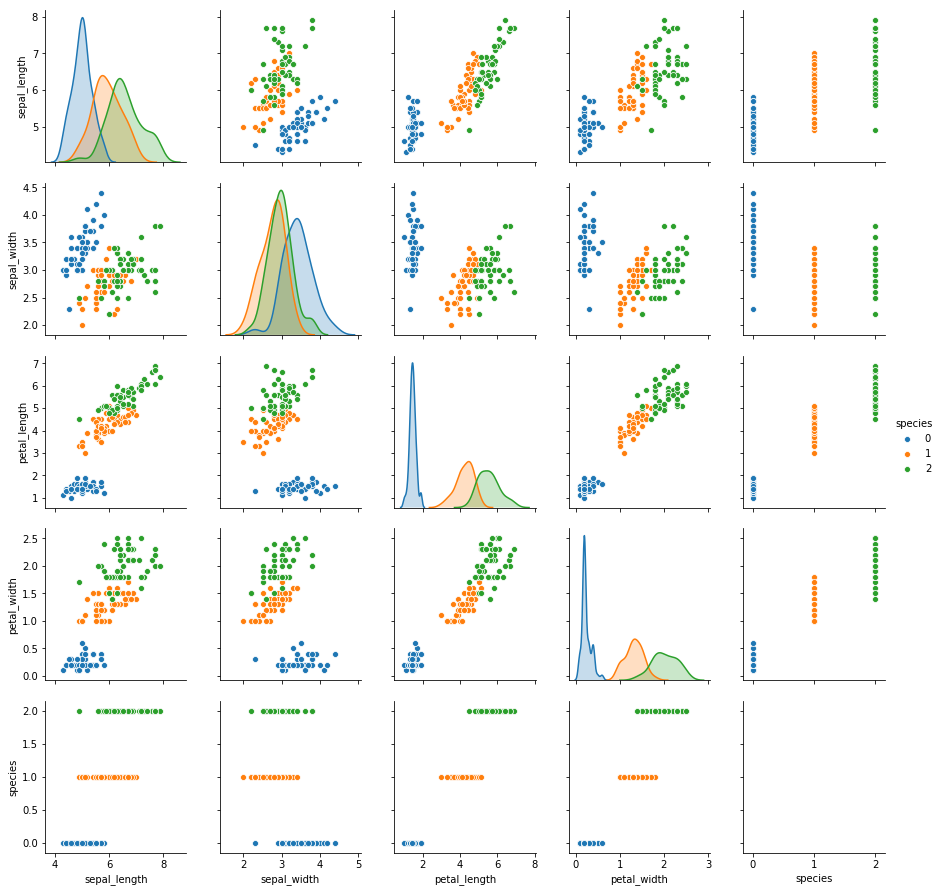

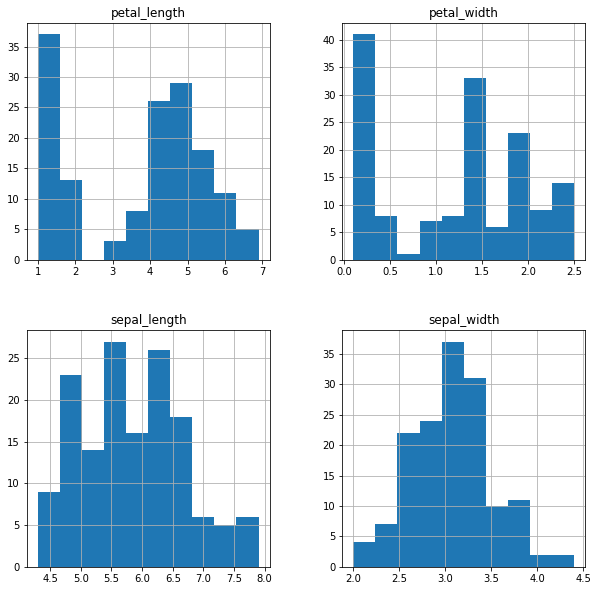

In [36]:
#постройте графики (гистограммы, зависимости).
sns.pairplot (iris, hue = "species")
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris[features].hist(figsize=(10,10));

In [37]:
iris.isnull().sum() #пустх строк нет.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [38]:
iris_new=iris.drop_duplicates(subset=None , keep='first', inplace=False ) 
iris_new

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Задание 2

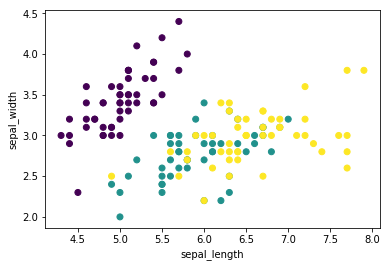

In [46]:
x_axis = iris_new.sepal_length
y_axis = iris_new.sepal_width  
 
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(x_axis, y_axis, c=iris_new.species)
plt.show()

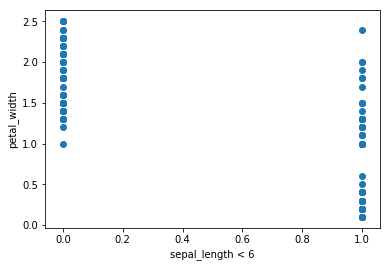

In [54]:
feature_1 = np.zeros(iris_new.shape[0])
feature_1[np.where(iris_new.sepal_length < 6)] = 1

x_axis = feature_1
y_axis = iris_new.petal_width
plt.xlabel('sepal_length < 6')
plt.ylabel('petal_width')
plt.scatter(x_axis, y_axis)
plt.show()

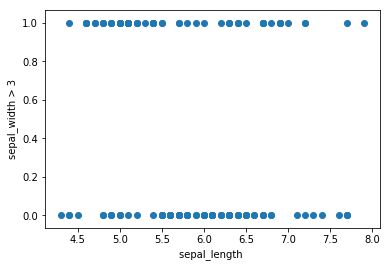

In [62]:
feature_2 = np.zeros(iris_new.shape[0])
feature_2[np.where(iris_new.sepal_width >3)] = 1

x_axis = iris_new.sepal_length
y_axis = feature_2
plt.xlabel('sepal_length ')
plt.ylabel('sepal_width > 3')
plt.scatter(x_axis,y_axis)
plt.show()

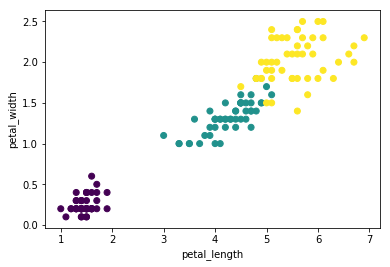

In [56]:
x_axis = iris_new.petal_length
y_axis = iris_new.petal_width  
 
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(x_axis, y_axis, c=iris_new.species)
plt.show()

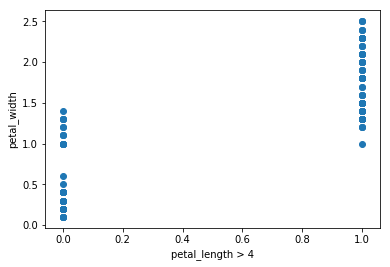

In [58]:
feature_1_petal = np.zeros(iris_new.shape[0])
feature_1_petal[np.where(iris_new.petal_length > 4)] = 1

x_axis = feature_1_petal
y_axis = iris_new.petal_width
plt.xlabel('petal_length > 4')
plt.ylabel('petal_width')
plt.scatter(x_axis, y_axis)
plt.show()

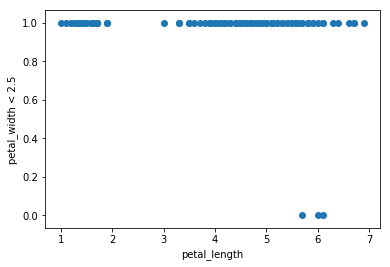

In [61]:
feature_2_petal = np.zeros(iris_new.shape[0])
feature_2_petal[np.where(iris_new.petal_width < 2.5)] = 1

x_axis = iris_new.petal_length
y_axis = feature_2_petal
plt.xlabel('petal_length')
plt.ylabel('petal_width < 2.5')
plt.scatter(x_axis,y_axis)
plt.show()

### Задание 3

### Создайте модель Catboost.Classifier

In [64]:
import catboost
from catboost import CatBoostClassifier

iris = datasets.load_iris()

cbc = catboost.CatBoostClassifier(loss_function='MultiClass') #создаем модель.
cbc.fit(iris.data, iris.target) #обучаем.
cbc.save_model("iris.mlmodel", format="coreml", export_parameters={'prediction_type': 'probability'})#сохраняем.

0:	learn: -1.0571453	total: 196ms	remaining: 3m 16s
1:	learn: -1.0253734	total: 221ms	remaining: 1m 50s
2:	learn: -0.9943168	total: 245ms	remaining: 1m 21s
3:	learn: -0.9619947	total: 271ms	remaining: 1m 7s
4:	learn: -0.9349442	total: 295ms	remaining: 58.8s
5:	learn: -0.9074849	total: 319ms	remaining: 52.9s
6:	learn: -0.8804875	total: 342ms	remaining: 48.6s
7:	learn: -0.8565491	total: 364ms	remaining: 45.2s
8:	learn: -0.8287516	total: 377ms	remaining: 41.6s
9:	learn: -0.8032069	total: 401ms	remaining: 39.7s
10:	learn: -0.7787833	total: 432ms	remaining: 38.9s
11:	learn: -0.7571021	total: 456ms	remaining: 37.5s
12:	learn: -0.7344302	total: 476ms	remaining: 36.2s
13:	learn: -0.7150964	total: 499ms	remaining: 35.2s
14:	learn: -0.6953170	total: 520ms	remaining: 34.2s
15:	learn: -0.6768361	total: 543ms	remaining: 33.4s
16:	learn: -0.6608039	total: 565ms	remaining: 32.7s
17:	learn: -0.6437625	total: 588ms	remaining: 32.1s
18:	learn: -0.6268943	total: 618ms	remaining: 31.9s
19:	learn: -0.61215

158:	learn: -0.1058654	total: 3.34s	remaining: 17.7s
159:	learn: -0.1050747	total: 3.36s	remaining: 17.7s
160:	learn: -0.1043982	total: 3.39s	remaining: 17.7s
161:	learn: -0.1038224	total: 3.44s	remaining: 17.8s
162:	learn: -0.1033074	total: 3.47s	remaining: 17.8s
163:	learn: -0.1027504	total: 3.5s	remaining: 17.8s
164:	learn: -0.1021448	total: 3.52s	remaining: 17.8s
165:	learn: -0.1015930	total: 3.55s	remaining: 17.8s
166:	learn: -0.1011332	total: 3.57s	remaining: 17.8s
167:	learn: -0.1007473	total: 3.59s	remaining: 17.8s
168:	learn: -0.1002730	total: 3.61s	remaining: 17.8s
169:	learn: -0.0998296	total: 3.63s	remaining: 17.7s
170:	learn: -0.0992929	total: 3.65s	remaining: 17.7s
171:	learn: -0.0988501	total: 3.67s	remaining: 17.7s
172:	learn: -0.0983797	total: 3.69s	remaining: 17.6s
173:	learn: -0.0977259	total: 3.71s	remaining: 17.6s
174:	learn: -0.0973417	total: 3.72s	remaining: 17.6s
175:	learn: -0.0969611	total: 3.75s	remaining: 17.5s
176:	learn: -0.0965207	total: 3.78s	remaining: 

317:	learn: -0.0528435	total: 7.13s	remaining: 15.3s
318:	learn: -0.0527084	total: 7.17s	remaining: 15.3s
319:	learn: -0.0525125	total: 7.21s	remaining: 15.3s
320:	learn: -0.0523380	total: 7.24s	remaining: 15.3s
321:	learn: -0.0520916	total: 7.26s	remaining: 15.3s
322:	learn: -0.0518880	total: 7.29s	remaining: 15.3s
323:	learn: -0.0517452	total: 7.3s	remaining: 15.2s
324:	learn: -0.0516371	total: 7.33s	remaining: 15.2s
325:	learn: -0.0514927	total: 7.35s	remaining: 15.2s
326:	learn: -0.0513692	total: 7.38s	remaining: 15.2s
327:	learn: -0.0511890	total: 7.41s	remaining: 15.2s
328:	learn: -0.0510335	total: 7.44s	remaining: 15.2s
329:	learn: -0.0508773	total: 7.49s	remaining: 15.2s
330:	learn: -0.0507223	total: 7.52s	remaining: 15.2s
331:	learn: -0.0504048	total: 7.56s	remaining: 15.2s
332:	learn: -0.0502553	total: 7.6s	remaining: 15.2s
333:	learn: -0.0500781	total: 7.63s	remaining: 15.2s
334:	learn: -0.0497069	total: 7.66s	remaining: 15.2s
335:	learn: -0.0495954	total: 7.67s	remaining: 1

478:	learn: -0.0334439	total: 10.5s	remaining: 11.4s
479:	learn: -0.0333894	total: 10.5s	remaining: 11.4s
480:	learn: -0.0331845	total: 10.5s	remaining: 11.4s
481:	learn: -0.0329799	total: 10.5s	remaining: 11.3s
482:	learn: -0.0329051	total: 10.6s	remaining: 11.3s
483:	learn: -0.0328210	total: 10.6s	remaining: 11.3s
484:	learn: -0.0327687	total: 10.6s	remaining: 11.3s
485:	learn: -0.0325967	total: 10.6s	remaining: 11.2s
486:	learn: -0.0325334	total: 10.6s	remaining: 11.2s
487:	learn: -0.0324276	total: 10.7s	remaining: 11.2s
488:	learn: -0.0323063	total: 10.7s	remaining: 11.2s
489:	learn: -0.0322507	total: 10.7s	remaining: 11.1s
490:	learn: -0.0321216	total: 10.7s	remaining: 11.1s
491:	learn: -0.0320675	total: 10.7s	remaining: 11.1s
492:	learn: -0.0320325	total: 10.8s	remaining: 11.1s
493:	learn: -0.0320027	total: 10.8s	remaining: 11.1s
494:	learn: -0.0318630	total: 10.8s	remaining: 11s
495:	learn: -0.0318288	total: 10.8s	remaining: 11s
496:	learn: -0.0317650	total: 10.8s	remaining: 11s

637:	learn: -0.0231070	total: 13.4s	remaining: 7.58s
638:	learn: -0.0230704	total: 13.4s	remaining: 7.56s
639:	learn: -0.0230432	total: 13.4s	remaining: 7.54s
640:	learn: -0.0230154	total: 13.4s	remaining: 7.52s
641:	learn: -0.0229372	total: 13.4s	remaining: 7.49s
642:	learn: -0.0229162	total: 13.5s	remaining: 7.47s
643:	learn: -0.0228242	total: 13.5s	remaining: 7.45s
644:	learn: -0.0228049	total: 13.5s	remaining: 7.43s
645:	learn: -0.0227738	total: 13.5s	remaining: 7.4s
646:	learn: -0.0227518	total: 13.5s	remaining: 7.38s
647:	learn: -0.0226396	total: 13.5s	remaining: 7.36s
648:	learn: -0.0225987	total: 13.6s	remaining: 7.34s
649:	learn: -0.0225841	total: 13.6s	remaining: 7.32s
650:	learn: -0.0225243	total: 13.6s	remaining: 7.29s
651:	learn: -0.0225004	total: 13.6s	remaining: 7.27s
652:	learn: -0.0224665	total: 13.6s	remaining: 7.25s
653:	learn: -0.0224159	total: 13.7s	remaining: 7.23s
654:	learn: -0.0223642	total: 13.7s	remaining: 7.21s
655:	learn: -0.0223298	total: 13.7s	remaining: 

796:	learn: -0.0176318	total: 16.7s	remaining: 4.25s
797:	learn: -0.0176239	total: 16.7s	remaining: 4.23s
798:	learn: -0.0176063	total: 16.7s	remaining: 4.21s
799:	learn: -0.0175910	total: 16.8s	remaining: 4.19s
800:	learn: -0.0175635	total: 16.8s	remaining: 4.17s
801:	learn: -0.0175555	total: 16.8s	remaining: 4.15s
802:	learn: -0.0175423	total: 16.8s	remaining: 4.12s
803:	learn: -0.0175303	total: 16.8s	remaining: 4.1s
804:	learn: -0.0175160	total: 16.8s	remaining: 4.08s
805:	learn: -0.0174468	total: 16.9s	remaining: 4.06s
806:	learn: -0.0173791	total: 16.9s	remaining: 4.04s
807:	learn: -0.0173564	total: 16.9s	remaining: 4.01s
808:	learn: -0.0173405	total: 16.9s	remaining: 3.99s
809:	learn: -0.0172937	total: 16.9s	remaining: 3.97s
810:	learn: -0.0172650	total: 16.9s	remaining: 3.95s
811:	learn: -0.0172520	total: 17s	remaining: 3.93s
812:	learn: -0.0171999	total: 17s	remaining: 3.91s
813:	learn: -0.0171629	total: 17s	remaining: 3.88s
814:	learn: -0.0171100	total: 17s	remaining: 3.86s
81

952:	learn: -0.0142483	total: 19.8s	remaining: 975ms
953:	learn: -0.0142421	total: 19.8s	remaining: 954ms
954:	learn: -0.0142367	total: 19.8s	remaining: 934ms
955:	learn: -0.0142149	total: 19.8s	remaining: 913ms
956:	learn: -0.0142057	total: 19.9s	remaining: 892ms
957:	learn: -0.0141977	total: 19.9s	remaining: 872ms
958:	learn: -0.0141583	total: 19.9s	remaining: 851ms
959:	learn: -0.0141409	total: 19.9s	remaining: 830ms
960:	learn: -0.0140923	total: 19.9s	remaining: 809ms
961:	learn: -0.0140733	total: 20s	remaining: 788ms
962:	learn: -0.0140379	total: 20s	remaining: 767ms
963:	learn: -0.0140203	total: 20s	remaining: 747ms
964:	learn: -0.0139919	total: 20s	remaining: 726ms
965:	learn: -0.0139848	total: 20s	remaining: 705ms
966:	learn: -0.0139540	total: 20.1s	remaining: 684ms
967:	learn: -0.0139420	total: 20.1s	remaining: 663ms
968:	learn: -0.0139358	total: 20.1s	remaining: 642ms
969:	learn: -0.0139182	total: 20.1s	remaining: 622ms
970:	learn: -0.0139139	total: 20.1s	remaining: 601ms
971

### Перемешайте данные
### Отберите 10 % данных для валидации
### Создайте объекты Pool для классификационных данных и валидационных, заполните cat_features индексами бинарных признаков

In [66]:
from sklearn.model_selection import train_test_split
from catboost import Pool
iris_train_x, iris_val_x,iris_train_y, iris_val_y = train_test_split(iris.data,  iris.target, 
                                                                     shuffle=True, test_size=0.1)

train_pool = Pool(iris_train_x, 
                  iris_train_y)
validate_pool = Pool(iris_val_x, 
                     iris_val_y)

models = []
for i in range(5):
    model = CatBoostClassifier(iterations=100, random_seed=i)
    model.fit(train_pool, eval_set=validate_pool)

Learning rate set to 0.169409
0:	learn: 0.4384132	test: 0.4381967	best: 0.4381967 (0)	total: 120ms	remaining: 11.9s
1:	learn: 0.2790349	test: 0.2654028	best: 0.2654028 (1)	total: 147ms	remaining: 7.22s
2:	learn: 0.1706415	test: 0.1580246	best: 0.1580246 (2)	total: 173ms	remaining: 5.6s
3:	learn: 0.1126103	test: 0.1006332	best: 0.1006332 (3)	total: 199ms	remaining: 4.78s
4:	learn: 0.0766689	test: 0.0677626	best: 0.0677626 (4)	total: 222ms	remaining: 4.21s
5:	learn: 0.0564766	test: 0.0491191	best: 0.0491191 (5)	total: 247ms	remaining: 3.86s
6:	learn: 0.0432499	test: 0.0366566	best: 0.0366566 (6)	total: 274ms	remaining: 3.63s
7:	learn: 0.0340164	test: 0.0281136	best: 0.0281136 (7)	total: 299ms	remaining: 3.44s
8:	learn: 0.0277553	test: 0.0236179	best: 0.0236179 (8)	total: 331ms	remaining: 3.34s
9:	learn: 0.0237644	test: 0.0201914	best: 0.0201914 (9)	total: 354ms	remaining: 3.19s
10:	learn: 0.0191970	test: 0.0163370	best: 0.0163370 (10)	total: 375ms	remaining: 3.04s
11:	learn: 0.0155744	te

Learning rate set to 0.169409
0:	learn: 0.3947676	test: 0.3873585	best: 0.3873585 (0)	total: 25.8ms	remaining: 2.55s
1:	learn: 0.2467523	test: 0.2309847	best: 0.2309847 (1)	total: 42.3ms	remaining: 2.07s
2:	learn: 0.1506901	test: 0.1412891	best: 0.1412891 (2)	total: 68.5ms	remaining: 2.21s
3:	learn: 0.0996333	test: 0.0911058	best: 0.0911058 (3)	total: 96.2ms	remaining: 2.31s
4:	learn: 0.0703920	test: 0.0598725	best: 0.0598725 (4)	total: 124ms	remaining: 2.36s
5:	learn: 0.0464790	test: 0.0399789	best: 0.0399789 (5)	total: 156ms	remaining: 2.44s
6:	learn: 0.0346613	test: 0.0290176	best: 0.0290176 (6)	total: 193ms	remaining: 2.56s
7:	learn: 0.0280057	test: 0.0227870	best: 0.0227870 (7)	total: 235ms	remaining: 2.7s
8:	learn: 0.0218738	test: 0.0173551	best: 0.0173551 (8)	total: 274ms	remaining: 2.77s
9:	learn: 0.0182877	test: 0.0148228	best: 0.0148228 (9)	total: 305ms	remaining: 2.74s
10:	learn: 0.0157967	test: 0.0122206	best: 0.0122206 (10)	total: 339ms	remaining: 2.74s
11:	learn: 0.013853

99:	learn: 0.0007013	test: 0.0004056	best: 0.0004056 (99)	total: 3.37s	remaining: 0us

bestTest = 0.0004056208873
bestIteration = 99

Learning rate set to 0.169409
0:	learn: 0.4070307	test: 0.4026775	best: 0.4026775 (0)	total: 24.9ms	remaining: 2.46s
1:	learn: 0.2658085	test: 0.2489428	best: 0.2489428 (1)	total: 50ms	remaining: 2.45s
2:	learn: 0.1786091	test: 0.1687438	best: 0.1687438 (2)	total: 75.8ms	remaining: 2.45s
3:	learn: 0.1109773	test: 0.1026719	best: 0.1026719 (3)	total: 99.6ms	remaining: 2.39s
4:	learn: 0.0773507	test: 0.0686394	best: 0.0686394 (4)	total: 125ms	remaining: 2.38s
5:	learn: 0.0552815	test: 0.0479518	best: 0.0479518 (5)	total: 154ms	remaining: 2.41s
6:	learn: 0.0392864	test: 0.0338367	best: 0.0338367 (6)	total: 177ms	remaining: 2.35s
7:	learn: 0.0310794	test: 0.0256599	best: 0.0256599 (7)	total: 214ms	remaining: 2.47s
8:	learn: 0.0255595	test: 0.0203602	best: 0.0203602 (8)	total: 259ms	remaining: 2.62s
9:	learn: 0.0208827	test: 0.0167008	best: 0.0167008 (9)	tota

94:	learn: 0.0007439	test: 0.0003707	best: 0.0003707 (94)	total: 3.23s	remaining: 170ms
95:	learn: 0.0007345	test: 0.0003658	best: 0.0003658 (95)	total: 3.25s	remaining: 136ms
96:	learn: 0.0007290	test: 0.0003612	best: 0.0003612 (96)	total: 3.29s	remaining: 102ms
97:	learn: 0.0007190	test: 0.0003573	best: 0.0003573 (97)	total: 3.34s	remaining: 68.1ms
98:	learn: 0.0007116	test: 0.0003544	best: 0.0003544 (98)	total: 3.38s	remaining: 34.1ms
99:	learn: 0.0007042	test: 0.0003494	best: 0.0003494 (99)	total: 3.43s	remaining: 0us

bestTest = 0.0003493782481
bestIteration = 99

Learning rate set to 0.169409
0:	learn: 0.3989237	test: 0.3930769	best: 0.3930769 (0)	total: 41ms	remaining: 4.06s
1:	learn: 0.2518467	test: 0.2412338	best: 0.2412338 (1)	total: 67.1ms	remaining: 3.29s
2:	learn: 0.1657195	test: 0.1486234	best: 0.1486234 (2)	total: 93.2ms	remaining: 3.01s
3:	learn: 0.1116981	test: 0.0994897	best: 0.0994897 (3)	total: 120ms	remaining: 2.89s
4:	learn: 0.0750632	test: 0.0706457	best: 0.07064

88:	learn: 0.0008386	test: 0.0006096	best: 0.0006096 (88)	total: 2.77s	remaining: 343ms
89:	learn: 0.0008361	test: 0.0006091	best: 0.0006091 (89)	total: 2.81s	remaining: 312ms
90:	learn: 0.0008185	test: 0.0005951	best: 0.0005951 (90)	total: 2.83s	remaining: 280ms
91:	learn: 0.0008108	test: 0.0005895	best: 0.0005895 (91)	total: 2.87s	remaining: 249ms
92:	learn: 0.0008030	test: 0.0005839	best: 0.0005839 (92)	total: 2.9s	remaining: 218ms
93:	learn: 0.0007972	test: 0.0005819	best: 0.0005819 (93)	total: 2.93s	remaining: 187ms
94:	learn: 0.0007926	test: 0.0005795	best: 0.0005795 (94)	total: 2.96s	remaining: 156ms
95:	learn: 0.0007836	test: 0.0005751	best: 0.0005751 (95)	total: 3s	remaining: 125ms
96:	learn: 0.0007796	test: 0.0005736	best: 0.0005736 (96)	total: 3.04s	remaining: 93.9ms
97:	learn: 0.0007733	test: 0.0005697	best: 0.0005697 (97)	total: 3.08s	remaining: 62.9ms
98:	learn: 0.0007609	test: 0.0005602	best: 0.0005602 (98)	total: 3.12s	remaining: 31.5ms
99:	learn: 0.0007523	test: 0.0005

87:	learn: 0.0008388	test: 0.0005199	best: 0.0005199 (87)	total: 2.94s	remaining: 400ms
88:	learn: 0.0008322	test: 0.0005172	best: 0.0005172 (88)	total: 2.96s	remaining: 366ms
89:	learn: 0.0008246	test: 0.0005100	best: 0.0005100 (89)	total: 2.99s	remaining: 333ms
90:	learn: 0.0008157	test: 0.0005034	best: 0.0005034 (90)	total: 3.02s	remaining: 299ms
91:	learn: 0.0007986	test: 0.0004933	best: 0.0004933 (91)	total: 3.05s	remaining: 265ms
92:	learn: 0.0007932	test: 0.0004891	best: 0.0004891 (92)	total: 3.09s	remaining: 233ms
93:	learn: 0.0007849	test: 0.0004835	best: 0.0004835 (93)	total: 3.13s	remaining: 200ms
94:	learn: 0.0007755	test: 0.0004759	best: 0.0004759 (94)	total: 3.17s	remaining: 167ms
95:	learn: 0.0007687	test: 0.0004717	best: 0.0004717 (95)	total: 3.21s	remaining: 134ms
96:	learn: 0.0007675	test: 0.0004697	best: 0.0004697 (96)	total: 3.23s	remaining: 99.8ms
97:	learn: 0.0007590	test: 0.0004642	best: 0.0004642 (97)	total: 3.25s	remaining: 66.4ms
98:	learn: 0.0007538	test: 0.0

### Выберите функцию ошибки для данной задачи, объясните свой выбор
### Обучите модель и оцените ошибку на валидационных данных

In [67]:
cbc = catboost.CatBoostClassifier(loss_function='MultiClass')

cbc.fit(validate_pool)

0:	learn: -1.0855585	total: 16.5ms	remaining: 16.4s
1:	learn: -1.0706517	total: 25.2ms	remaining: 12.6s
2:	learn: -1.0543371	total: 33.5ms	remaining: 11.1s
3:	learn: -1.0437955	total: 46.1ms	remaining: 11.5s
4:	learn: -1.0298717	total: 56.5ms	remaining: 11.2s
5:	learn: -1.0144941	total: 62.9ms	remaining: 10.4s
6:	learn: -1.0036432	total: 72.9ms	remaining: 10.3s
7:	learn: -0.9933778	total: 83.1ms	remaining: 10.3s
8:	learn: -0.9789093	total: 91.7ms	remaining: 10.1s
9:	learn: -0.9653628	total: 96.3ms	remaining: 9.54s
10:	learn: -0.9559102	total: 105ms	remaining: 9.4s
11:	learn: -0.9446225	total: 116ms	remaining: 9.58s
12:	learn: -0.9343684	total: 129ms	remaining: 9.78s
13:	learn: -0.9230015	total: 142ms	remaining: 9.97s
14:	learn: -0.9123745	total: 152ms	remaining: 9.96s
15:	learn: -0.8982831	total: 158ms	remaining: 9.72s
16:	learn: -0.8894290	total: 171ms	remaining: 9.89s
17:	learn: -0.8759385	total: 178ms	remaining: 9.71s
18:	learn: -0.8671284	total: 191ms	remaining: 9.86s
19:	learn: -0

167:	learn: -0.2784173	total: 1.76s	remaining: 8.74s
168:	learn: -0.2774407	total: 1.78s	remaining: 8.75s
169:	learn: -0.2756980	total: 1.79s	remaining: 8.72s
170:	learn: -0.2741826	total: 1.79s	remaining: 8.71s
171:	learn: -0.2724845	total: 1.8s	remaining: 8.68s
172:	learn: -0.2712630	total: 1.81s	remaining: 8.66s
173:	learn: -0.2703988	total: 1.82s	remaining: 8.67s
174:	learn: -0.2687531	total: 1.83s	remaining: 8.64s
175:	learn: -0.2669011	total: 1.84s	remaining: 8.61s
176:	learn: -0.2654988	total: 1.85s	remaining: 8.59s
177:	learn: -0.2644161	total: 1.86s	remaining: 8.6s
178:	learn: -0.2629813	total: 1.87s	remaining: 8.58s
179:	learn: -0.2611940	total: 1.88s	remaining: 8.55s
180:	learn: -0.2600555	total: 1.88s	remaining: 8.53s
181:	learn: -0.2587101	total: 1.89s	remaining: 8.5s
182:	learn: -0.2574415	total: 1.9s	remaining: 8.48s
183:	learn: -0.2560888	total: 1.91s	remaining: 8.46s
184:	learn: -0.2547455	total: 1.92s	remaining: 8.44s
185:	learn: -0.2537130	total: 1.92s	remaining: 8.4

324:	learn: -0.1507209	total: 3.36s	remaining: 6.98s
325:	learn: -0.1504228	total: 3.37s	remaining: 6.97s
326:	learn: -0.1500699	total: 3.39s	remaining: 6.98s
327:	learn: -0.1497210	total: 3.41s	remaining: 6.99s
328:	learn: -0.1490089	total: 3.44s	remaining: 7.03s
329:	learn: -0.1483035	total: 3.47s	remaining: 7.05s
330:	learn: -0.1478534	total: 3.5s	remaining: 7.06s
331:	learn: -0.1474320	total: 3.51s	remaining: 7.07s
332:	learn: -0.1472316	total: 3.54s	remaining: 7.08s
333:	learn: -0.1469838	total: 3.55s	remaining: 7.08s
334:	learn: -0.1466758	total: 3.56s	remaining: 7.08s
335:	learn: -0.1464203	total: 3.58s	remaining: 7.08s
336:	learn: -0.1460128	total: 3.59s	remaining: 7.07s
337:	learn: -0.1457622	total: 3.61s	remaining: 7.07s
338:	learn: -0.1453574	total: 3.62s	remaining: 7.06s
339:	learn: -0.1451059	total: 3.64s	remaining: 7.07s
340:	learn: -0.1447108	total: 3.65s	remaining: 7.06s
341:	learn: -0.1444347	total: 3.67s	remaining: 7.06s
342:	learn: -0.1441818	total: 3.7s	remaining: 7

492:	learn: -0.1022254	total: 5.55s	remaining: 5.71s
493:	learn: -0.1021106	total: 5.57s	remaining: 5.7s
494:	learn: -0.1017183	total: 5.58s	remaining: 5.69s
495:	learn: -0.1016045	total: 5.59s	remaining: 5.68s
496:	learn: -0.1012290	total: 5.61s	remaining: 5.67s
497:	learn: -0.1010235	total: 5.61s	remaining: 5.66s
498:	learn: -0.1008971	total: 5.62s	remaining: 5.64s
499:	learn: -0.1005880	total: 5.63s	remaining: 5.63s
500:	learn: -0.1005007	total: 5.65s	remaining: 5.63s
501:	learn: -0.1003781	total: 5.66s	remaining: 5.61s
502:	learn: -0.1002129	total: 5.66s	remaining: 5.6s
503:	learn: -0.0998280	total: 5.67s	remaining: 5.58s
504:	learn: -0.0996488	total: 5.68s	remaining: 5.57s
505:	learn: -0.0994874	total: 5.69s	remaining: 5.55s
506:	learn: -0.0993253	total: 5.69s	remaining: 5.54s
507:	learn: -0.0992174	total: 5.7s	remaining: 5.52s
508:	learn: -0.0988474	total: 5.72s	remaining: 5.51s
509:	learn: -0.0986769	total: 5.72s	remaining: 5.5s
510:	learn: -0.0985838	total: 5.74s	remaining: 5.4

662:	learn: -0.0766261	total: 7.49s	remaining: 3.81s
663:	learn: -0.0765696	total: 7.51s	remaining: 3.8s
664:	learn: -0.0765032	total: 7.52s	remaining: 3.79s
665:	learn: -0.0764420	total: 7.53s	remaining: 3.78s
666:	learn: -0.0763722	total: 7.54s	remaining: 3.77s
667:	learn: -0.0763357	total: 7.55s	remaining: 3.75s
668:	learn: -0.0762760	total: 7.56s	remaining: 3.74s
669:	learn: -0.0762142	total: 7.57s	remaining: 3.73s
670:	learn: -0.0761275	total: 7.58s	remaining: 3.72s
671:	learn: -0.0760303	total: 7.59s	remaining: 3.7s
672:	learn: -0.0759716	total: 7.6s	remaining: 3.69s
673:	learn: -0.0757286	total: 7.61s	remaining: 3.68s
674:	learn: -0.0756610	total: 7.62s	remaining: 3.67s
675:	learn: -0.0754161	total: 7.63s	remaining: 3.66s
676:	learn: -0.0753766	total: 7.64s	remaining: 3.65s
677:	learn: -0.0753094	total: 7.66s	remaining: 3.63s
678:	learn: -0.0752426	total: 7.66s	remaining: 3.62s
679:	learn: -0.0751587	total: 7.67s	remaining: 3.61s
680:	learn: -0.0749272	total: 7.69s	remaining: 3.

823:	learn: -0.0625546	total: 9.42s	remaining: 2.01s
824:	learn: -0.0625137	total: 9.44s	remaining: 2s
825:	learn: -0.0623416	total: 9.45s	remaining: 1.99s
826:	learn: -0.0621667	total: 9.46s	remaining: 1.98s
827:	learn: -0.0620480	total: 9.48s	remaining: 1.97s
828:	learn: -0.0620175	total: 9.49s	remaining: 1.96s
829:	learn: -0.0619639	total: 9.5s	remaining: 1.95s
830:	learn: -0.0618445	total: 9.51s	remaining: 1.93s
831:	learn: -0.0617873	total: 9.52s	remaining: 1.92s
832:	learn: -0.0617541	total: 9.53s	remaining: 1.91s
833:	learn: -0.0617063	total: 9.54s	remaining: 1.9s
834:	learn: -0.0615878	total: 9.55s	remaining: 1.89s
835:	learn: -0.0615403	total: 9.56s	remaining: 1.88s
836:	learn: -0.0614989	total: 9.57s	remaining: 1.86s
837:	learn: -0.0614778	total: 9.58s	remaining: 1.85s
838:	learn: -0.0614468	total: 9.59s	remaining: 1.84s
839:	learn: -0.0613998	total: 9.61s	remaining: 1.83s
840:	learn: -0.0613679	total: 9.62s	remaining: 1.82s
841:	learn: -0.0612277	total: 9.64s	remaining: 1.81

987:	learn: -0.0521053	total: 11.3s	remaining: 137ms
988:	learn: -0.0520814	total: 11.3s	remaining: 126ms
989:	learn: -0.0520598	total: 11.3s	remaining: 114ms
990:	learn: -0.0520234	total: 11.3s	remaining: 103ms
991:	learn: -0.0520082	total: 11.3s	remaining: 91.5ms
992:	learn: -0.0519577	total: 11.3s	remaining: 80ms
993:	learn: -0.0519398	total: 11.4s	remaining: 68.6ms
994:	learn: -0.0519213	total: 11.4s	remaining: 57.2ms
995:	learn: -0.0519068	total: 11.4s	remaining: 45.7ms
996:	learn: -0.0518868	total: 11.4s	remaining: 34.3ms
997:	learn: -0.0518509	total: 11.4s	remaining: 22.9ms
998:	learn: -0.0518241	total: 11.4s	remaining: 11.4ms
999:	learn: -0.0517935	total: 11.4s	remaining: 0us
